**Prepare a classification model using SVM for salary data**

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

**Data collection and description**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv
Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [3]:
train=pd.read_csv("SalaryData_Train(1).csv")
test=pd.read_csv("SalaryData_Test(1).csv")

In [4]:
columns=["age","workclass","education","educationno","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","native","Salary"]

In [5]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


**EDA (Exploratory Data Analysis)**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<ipython-input-14-e35647a7058e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(), cmap='magma', annot=True, fmt=".3f")


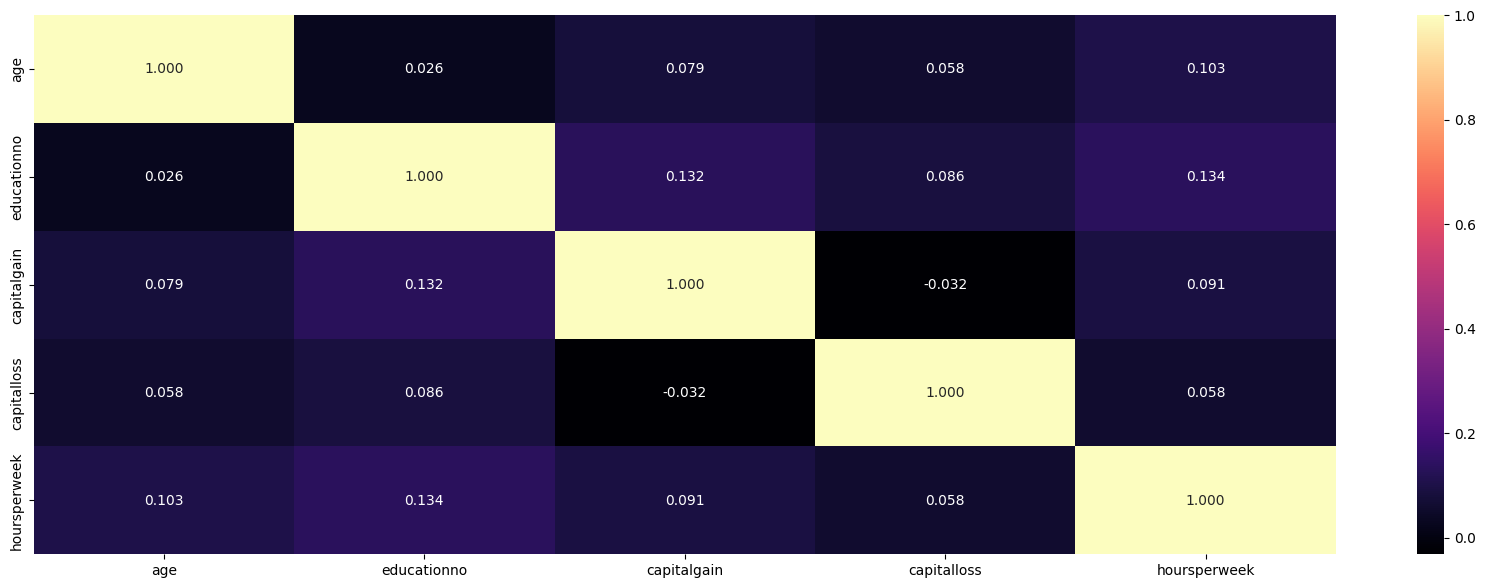

In [14]:
plt.figure(figsize = (21, 7));
sns.heatmap(test.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

<ipython-input-15-008738bd82fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='magma', annot=True, fmt=".3f")


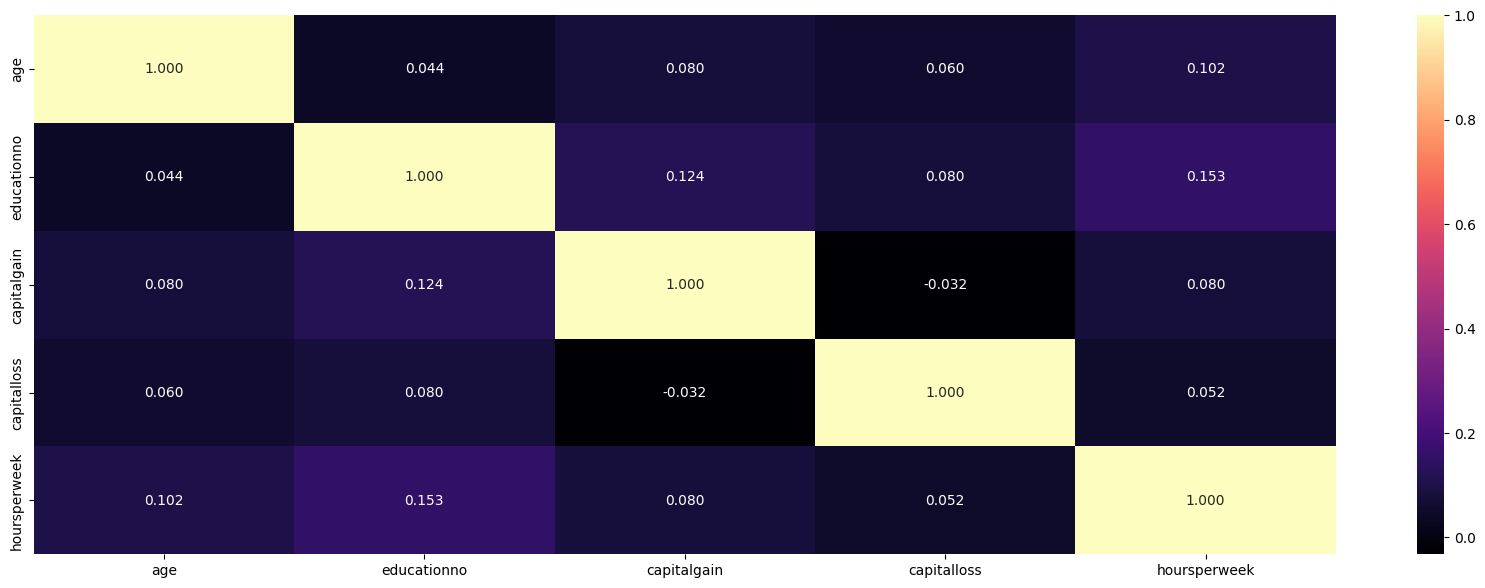

In [15]:
plt.figure(figsize = (21, 7));
sns.heatmap(train.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

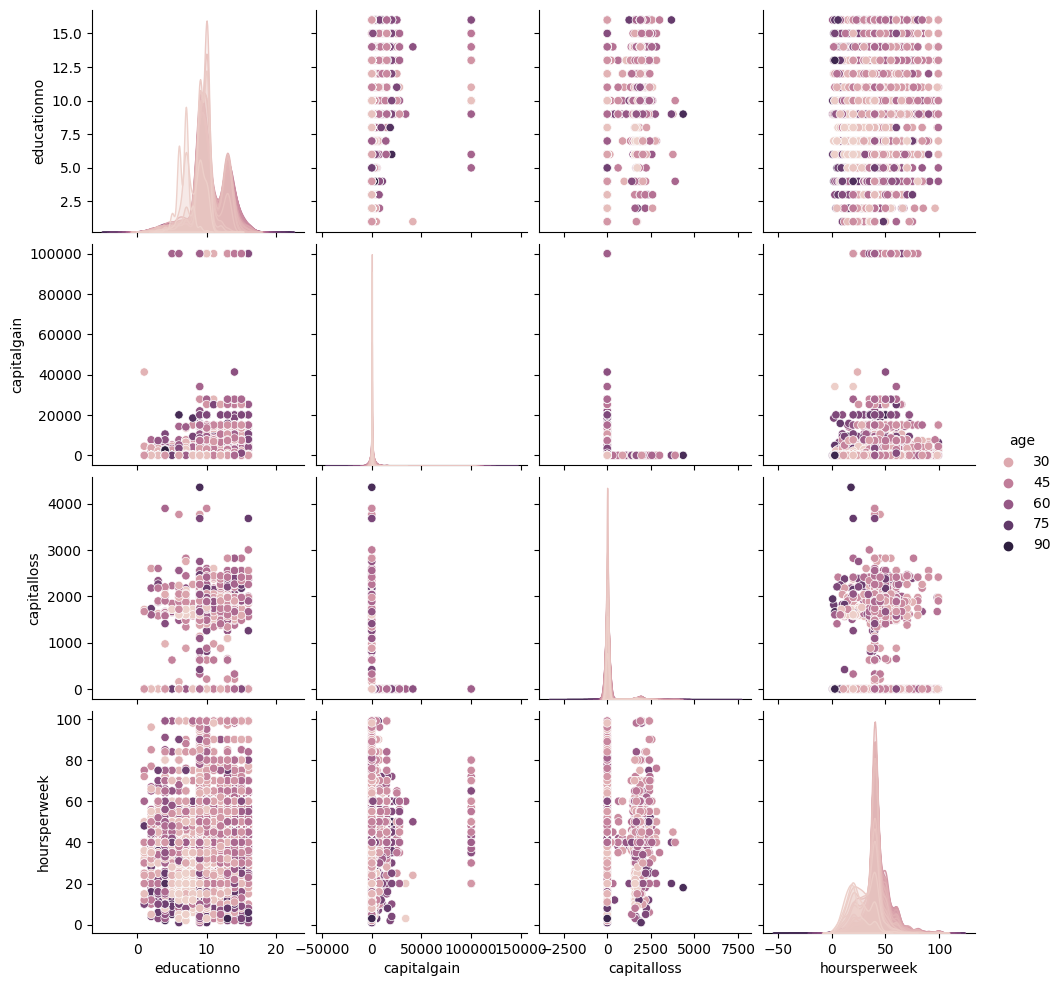

In [16]:
sns.pairplot(train, hue='age')

<ipython-input-17-a1a15256d669>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['hoursperweek'])


<Axes: xlabel='hoursperweek', ylabel='Density'>

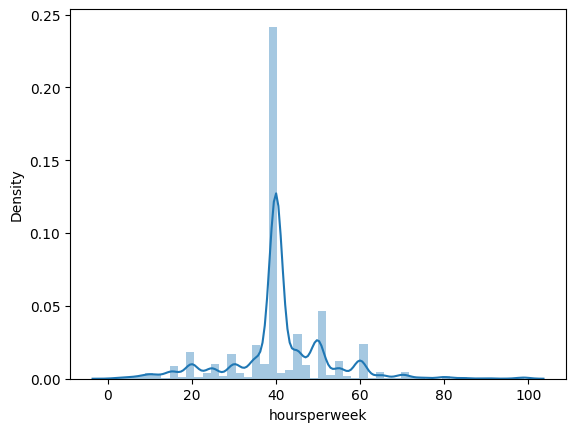

In [17]:
sns.distplot(train['hoursperweek'])

<ipython-input-18-9209fd567a34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['hoursperweek'])


<Axes: xlabel='hoursperweek', ylabel='Density'>

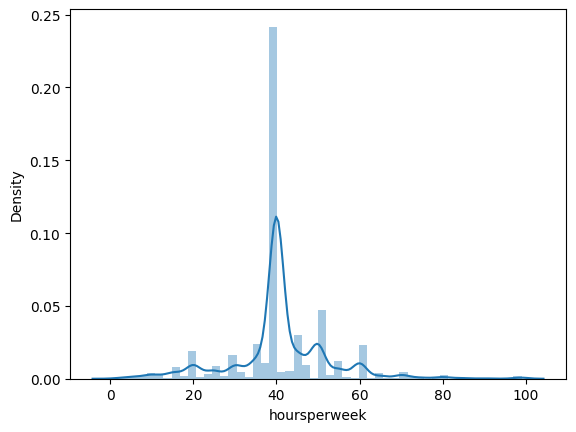

In [18]:
sns.distplot(test['hoursperweek'])

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [20]:
train= train.apply(LabelEncoder().fit_transform)
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,23,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,5,2,11,8,4,0,3,4,1,0,0,19,37,0


In [21]:
test= test.apply(LabelEncoder().fit_transform)
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int64
 2   education      30161 non-null  int64
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int64
 5   occupation     30161 non-null  int64
 6   relationship   30161 non-null  int64
 7   race           30161 non-null  int64
 8   sex            30161 non-null  int64
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int64
 13  Salary         30161 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


In [23]:
x_train = train.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
y_train = train['Salary'].values

In [24]:
x_train

array([[ 22,   5,   9, ...,  24,   0,  39],
       [ 33,   4,   9, ...,   0,   0,  12],
       [ 21,   2,  11, ...,   0,   0,  39],
       ...,
       [ 41,   2,  11, ...,   0,   0,  39],
       [  5,   2,  11, ...,   0,   0,  19],
       [ 35,   3,  11, ..., 107,   0,  39]])

In [25]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
x_test = test.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
y_test = test['Salary'].values

In [27]:
x_test

array([[ 8,  2,  1, ...,  0,  0, 39],
       [21,  2, 11, ...,  0,  0, 49],
       [11,  1,  7, ...,  0,  0, 39],
       ...,
       [21,  2,  9, ...,  0,  0, 49],
       [27,  2,  9, ..., 73,  0, 39],
       [18,  3,  9, ...,  0,  0, 59]])

In [28]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [29]:
number = preprocessing.LabelEncoder()
for i in columns:
    train[i] = number.fit_transform(train[i])
    test[i] = number.fit_transform(test[i])

colnames = train.columns

In [30]:
trainx = train[colnames[0:13]]
trainy = train[colnames[13]]
testx = test[colnames[0:13]]
testy  = test[colnames[13]]

In [31]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [32]:
trainx = norm_func(trainx)
testx =  norm_func(testx)

**SVM (Support Vector Machine )**

1) Linear


In [33]:
from sklearn.svm import SVC

model_linear = SVC(kernel = "linear")
model_linear.fit(trainx,trainy)
pred_test_linear = model_linear.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_linear))

Accuracy: 0.8034528552456839


2) Poly

In [34]:
model_poly = SVC(kernel = "poly",gamma="auto")
model_poly.fit(trainx,trainy)
pred_test_poly = model_poly.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_poly))

Accuracy: 0.8247011952191236


3) RBF

In [35]:
model_rbf = SVC(kernel = "rbf",gamma="auto")
model_rbf.fit(trainx,trainy)
pred_test_rbf = model_rbf.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_rbf))

Accuracy: 0.8330013280212484


In [36]:
from sklearn.metrics import classification_report
model=SVC()
model.fit(trainx,trainy)
pred=model.predict(testx)
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     12243
           1       0.56      0.74      0.64      2817

    accuracy                           0.84     15060
   macro avg       0.75      0.80      0.77     15060
weighted avg       0.87      0.84      0.85     15060

